# SW11-Exercises
## Black-box modelling of wind turbines

Data are extracted from https://opendata-renewables.engie.com/ for Turbine R80721 for 2017 and 2018.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

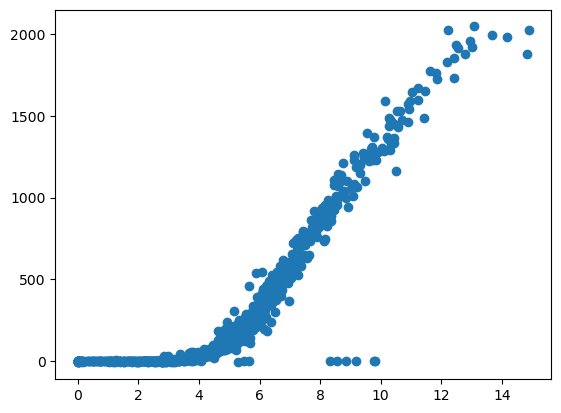

In [2]:
# preprocessed data
data_excerpt=pd.read_csv("wind-data-R80721.csv")

#visualising data
plt.scatter("Ws_avg","P_avg",data=data_excerpt)

In [3]:
# cleaning outliners
data=data_excerpt.dropna()
display(data)

,Unnamed: 0,Date_time,Ws_avg,P_avg
0,1,2017-01-26T02:40:00+01:00,4.85,197.32001
1,2,2017-01-26T13:50:00+01:00,5.04,176.45000
2,3,2017-01-26T15:00:00+01:00,5.31,190.61000
3,4,2017-02-18T01:10:00+01:00,3.15,-2.88000
4,5,2017-01-27T18:50:00+01:00,5.20,143.39999
...,...,...,...,...
994,995,2017-11-06T17:50:00+01:00,7.21,743.57000
995,996,2017-04-29T10:00:00+02:00,0.17,-0.82000
996,997,2017-06-02T07:50:00+02:00,3.18,0.00000
997,998,2017-11-06T19:20:00+01:00,8.11,940.43000


array([1.87076677e+03, 6.66306166e-01, 8.49310645e+00])

Text(0, 0.5, 'Power [kW]')

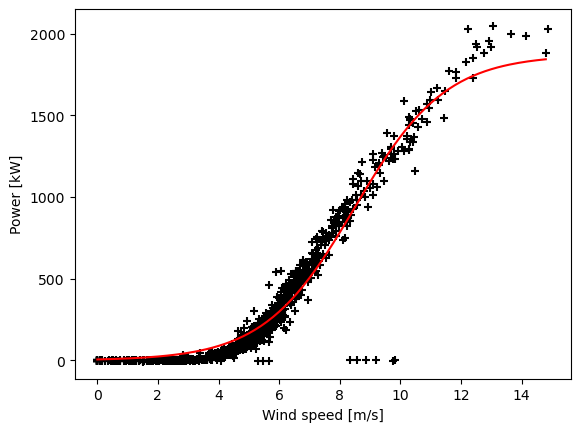

In [4]:
# define sigmoidal function
def sigmoidal(time, amplitude, damping , shift):
    return amplitude/(1+np.exp(-damping*(time-shift)))

from scipy import optimize

#fitting process
optimalParameters, cov = optimize.curve_fit(f=sigmoidal, xdata=data["Ws_avg"], ydata=data["P_avg"], p0=[2000,0.7,8.5])
display(optimalParameters)

# visualise data and fitting data
plt.scatter(data["Ws_avg"], data["P_avg"],marker="+",color="black")
wind_speeds=np.arange(0,max(data["Ws_avg"]),0.1)

fitted=sigmoidal(wind_speeds,optimalParameters[0],optimalParameters[1],optimalParameters[2])
plt.plot(wind_speeds,fitted,"r")
plt.xlabel("Wind speed [m/s]")
plt.ylabel("Power [kW]")
#plt.savefig("wind-speed-fitted.png",bbox_inches="tight",dpi=500)

In conclusion, we replaced the measurement data with the fit function:

$$ \mathrm{Power}(\mathrm{windspeed}\, w)=\frac{1870}{1+\exp(-0.666\cdot (w - 8.49))}$$